# **Monochrome Camera Calibration Exercise**

## **Overview**

Camera calibration is a fundamental task in computer vision to correct the distortions introduced by lenses. When using cameras to measure or represent the physical world, it is essential to remove lens distortion so that straight lines in the real world appear straight in the image. This is critical in applications like 3D reconstruction, robotics, and augmented reality, where accurate image representation is necessary.

### **Purpose**
The purpose of this exercise is to calibrate a monochrome camera using a chessboard pattern, compute the camera matrix and distortion coefficients, and finally, undistort an image. This process will ensure that the camera can capture images that are geometrically accurate, free from distortion.

### **Theory**

1. **Lens Distortion**: Real-world lenses introduce various types of distortions in images. The most common type is radial distortion, which makes straight lines appear curved. Calibration helps in determining the distortion parameters and correcting these effects.
   
2. **Camera Matrix**: This matrix contains the intrinsic parameters of the camera, such as focal length and the optical center, which are necessary for accurately mapping 3D world points to 2D image points.

3. **Chessboard Calibration**: The chessboard pattern is commonly used in camera calibration due to its distinct corners, which are easy to detect. By capturing multiple images of a chessboard from different angles, we can estimate the camera parameters and distortion coefficients.

### **Algorithmic Steps**

1. **Corner Detection**: 
   - The first step is detecting the chessboard corners in a series of images. We use the `cv2.findChessboardCorners()` function from OpenCV to locate these points. The parameters passed to this function are the number of inner corners along the vertical and horizontal direction of the chessboard.

2. **Camera Calibration**:
   - Once the corners are detected, we use the `cv2.calibrateCamera()` function to compute the camera matrix, distortion coefficients, rotation, and translation vectors. This step uses the detected corner points and known 3D positions of these points on the chessboard to perform the calibration.

3. **Undistortion**:
   - After computing the camera matrix and distortion coefficients, we use the `cv2.undistort()` function to correct an image by removing the lens distortion. The result is a geometrically accurate image where straight lines in the real world appear straight in the image.

4. **Cropping**:
   - The final step is optional and helps refine the undistorted image by cropping out the black borders that may appear due to the distortion correction.

### **Parameters and Functions**

1. **`findChessboardCorners()`**:
   - **Parameters**:
     - `gray`: Grayscale image where the corners are searched.
     - `(nb_vertical, nb_horizontal)`: Number of internal corners in the chessboard pattern.
     - `None`: No flags used.
   - **Returns**:
     - `ret`: A boolean indicating whether the corners were successfully found.
     - `corners`: The coordinates of the detected corners.

2. **`calibrateCamera()`**:
   - **Parameters**:
     - `objpoints`: 3D points in the real world corresponding to the chessboard.
     - `imgpoints`: 2D points in the image corresponding to the detected corners.
     - `gray.shape[::-1]`: Image size in the form (width, height).
     - `None, None`: Initial guesses for the camera matrix and distortion coefficients (left as None for automatic initialization).
   - **Returns**:
     - `mtx`: The camera matrix (intrinsic parameters).
     - `dist`: Distortion coefficients.
     - `rvecs, tvecs`: Rotation and translation vectors for each image.

3. **`getOptimalNewCameraMatrix()`**:
   - **Parameters**:
     - `mtx`: The original camera matrix.
     - `dist`: Distortion coefficients.
     - `(w, h)`: Image size.
   - **Returns**:
     - `newcameramtx`: Optimized camera matrix.
     - `roi`: Region of interest for cropping the image after undistortion.

4. **`undistort()`**:
   - **Parameters**:
     - `img`: Original distorted image.
     - `mtx`: Original camera matrix.
     - `dist`: Distortion coefficients.
     - `None`: Placeholder for undistortion map (left as None for automatic computation).
     - `newcameramtx`: The optimized camera matrix.
   - **Returns**:
     - `dst`: The undistorted image.

5. **`drawChessboardCorners()`**:
   - **Parameters**:
     - `img`: Image in which to draw the corners.
     - `(nb_vertical, nb_horizontal)`: Number of inner corners on the chessboard.
     - `corners`: Detected corners.
     - `ret`: Boolean indicating successful detection.
   - **Returns**: The image with drawn corners for visualization.

### **Conclusion**
This exercise walks through the steps required to calibrate a monochrome camera using a chessboard pattern, extract the camera matrix and distortion coefficients, and undistort images. This process is crucial in applications where image accuracy and lack of distortion are important for representing the real world.


In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

## Exercise 1
The process of calibrating an image consists of mainly 3 steps: 1) find chessboard-corners in a dataset of images containing a chessboard. 2) Use the corner points to compute a camera matrix. 3) Use the camera matrix to undistort images.

After setting some optimization parameters we can loop over all the images in the `imgs` folder and extract the checkerboard corners.

Use any of the images in the folder `imgs` to extract the number of checkerboard corners there are on the checkerboard. Fill in the information in `nb_vertical` and `nb_horizontal` and look up the opencv [findChessboardCorners](https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html#ga93efa9b0aa890de240ca32b11253dd4a) function and implement it in the below code snippet .

In [2]:
# Implement the number of vertical and horizontal corners
nb_vertical = 6
nb_horizontal = 7

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('imgs/*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    # Implement findChessboardCorners here
    ret, corners = cv2.findChessboardCorners(gray, (nb_vertical,nb_horizontal), None)
    

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

Using the extracted corners we can obtain a camera matrix that contains the information needed to undistort images

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('imgs/1403709067387836928.png')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

The last step is to actually undistort an image:

Text(0.5, 1.0, 'Undistorted image')

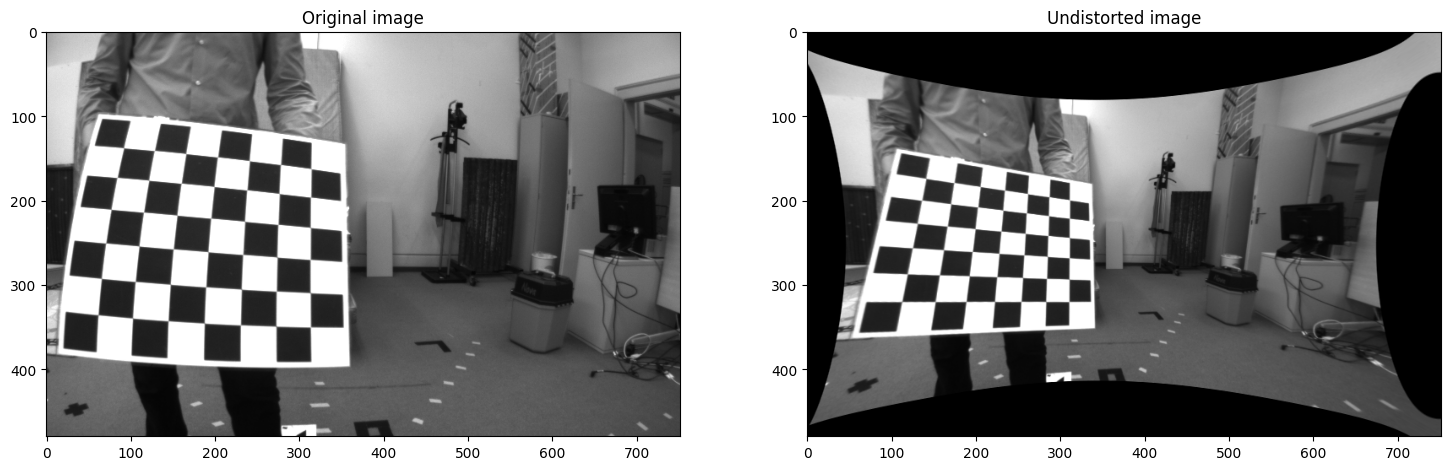

In [4]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

A refining step can be to crop the image such that it doesn't contain the large black areas at the edges of the image.

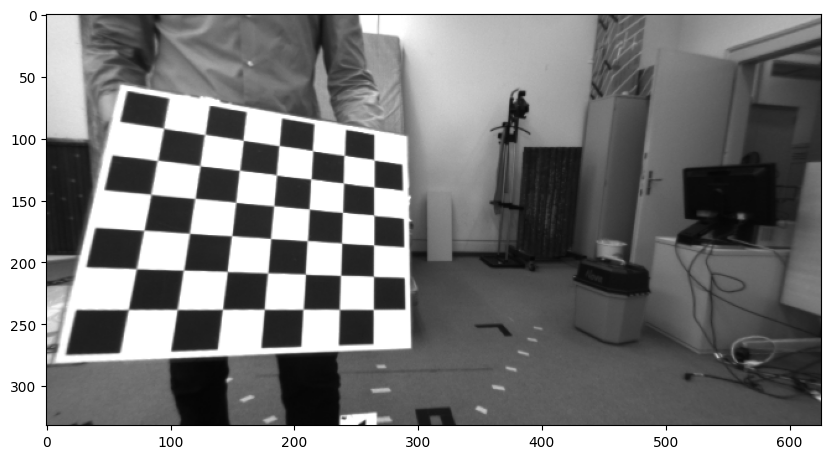

In [5]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst[...,[2,1,0]])